In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
df = pd.read_csv("fake_job_postings.csv", skipinitialspace = True)
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
# replace NaN to empty string
df=df.replace(np.nan,"Missing")

In [4]:
def code(string):
    return string.split(",")[0]
df['location']=df['location'].apply(code)

In [5]:
# strip the white space
df.title = df.title.str.split()

## Required experiences in the jobs

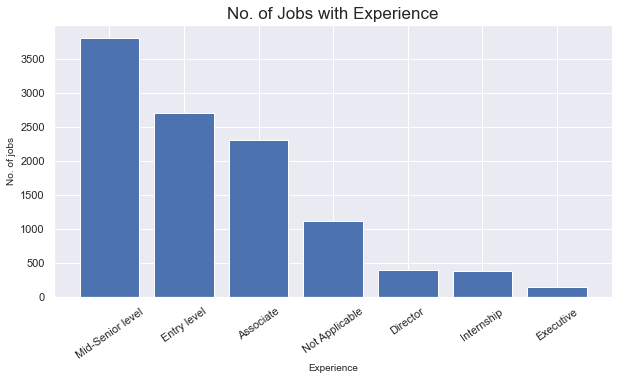

In [6]:
#Visualize the required experiences in the jobs
experience = dict(df.required_experience.value_counts())
del experience['Missing']
plt.figure(figsize=(10,5))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience', fontdict = {"fontsize" : 17})
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In the whole dataset, mid-senior level is the level of experience that is most required.

# Countries in the dataset

Number of Countries : 91


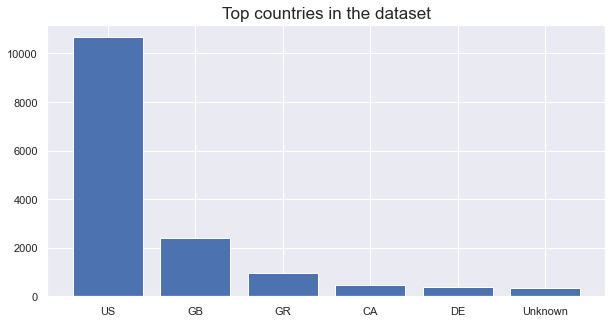

{'US': 10656, 'GB': 2384, 'GR': 940, 'CA': 457, 'DE': 383, 'Unknown': 346}
['US', 'GB', 'GR', 'CA', 'DE', 'Unknown']


In [7]:
#Total countries in the dataset
print("Number of Countries :", len(df["location"].unique()))

#Number of jobs per country

#Form a graph of countries as per their job numbers (TO DO)*

d1=dict(df["location"].value_counts().head(n=6))


d1["Unknown"] = d1.pop('Missing')

plt.figure(figsize=(10,5))
plt.bar(*zip(*d1.items()))
plt.title("Top countries in the dataset", fontdict = {"fontsize" : 17})
plt.show()


print(d1)

countries = list(d1.keys())
print(countries)

# Employment types in the dataset

In [8]:
employment_type = df.employment_type.value_counts()
employment_type

Full-time    11620
Missing       3471
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

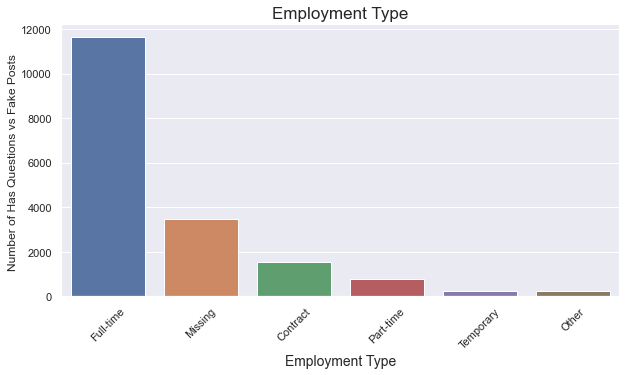

In [9]:
plt.figure(figsize = (10,5))
sb.barplot(x = employment_type.index, y = employment_type)
plt.title("Employment Type", fontdict = {"fontsize" : 17})
plt.xlabel("Employment Type", fontdict = {"fontsize" : 14})
plt.ylabel("Number of Has Questions vs Fake Posts ", fontdict = {"fontsize" : 12})
plt.xticks(rotation = 45);

Most of the job ads ask for full-time employment. The orange column is NaN.

### List unique values in some columns

In [10]:
df.telecommuting.unique()

array([0, 1], dtype=int64)

In [11]:
df.has_company_logo.unique()

array([1, 0], dtype=int64)

In [12]:
df.has_questions.unique()

array([0, 1], dtype=int64)

In [13]:
df.employment_type.unique()

array(['Other', 'Full-time', 'Missing', 'Part-time', 'Contract',
       'Temporary'], dtype=object)

In [14]:
df.required_experience.unique()

array(['Internship', 'Not Applicable', 'Missing', 'Mid-Senior level',
       'Associate', 'Entry level', 'Executive', 'Director'], dtype=object)

In [15]:
df.required_education.unique()

array(['Missing', "Bachelor's Degree", "Master's Degree",
       'High School or equivalent', 'Unspecified',
       'Some College Coursework Completed', 'Vocational', 'Certification',
       'Associate Degree', 'Professional', 'Doctorate',
       'Some High School Coursework', 'Vocational - Degree',
       'Vocational - HS Diploma'], dtype=object)

In [16]:
df.industry.unique()

array(['Missing', 'Marketing and Advertising', 'Computer Software',
       'Hospital & Health Care', 'Online Media',
       'Information Technology and Services', 'Financial Services',
       'Management Consulting', 'Events Services', 'Internet',
       'Facilities Services', 'Consumer Electronics',
       'Telecommunications', 'Consumer Services', 'Construction',
       'Oil & Energy', 'Education Management', 'Building Materials',
       'Banking', 'Food & Beverages', 'Food Production',
       'Health, Wellness and Fitness', 'Insurance', 'E-Learning',
       'Cosmetics', 'Staffing and Recruiting',
       'Venture Capital & Private Equity', 'Leisure, Travel & Tourism',
       'Human Resources', 'Pharmaceuticals', 'Farming', 'Legal Services',
       'Luxury Goods & Jewelry', 'Machinery', 'Real Estate',
       'Mechanical or Industrial Engineering',
       'Public Relations and Communications', 'Consumer Goods',
       'Medical Practice', 'Electrical/Electronic Manufacturing',
       'H

In [17]:
df.function.unique()

array(['Marketing', 'Customer Service', 'Missing', 'Sales',
       'Health Care Provider', 'Management', 'Information Technology',
       'Other', 'Engineering', 'Administrative', 'Design', 'Production',
       'Education', 'Supply Chain', 'Business Development',
       'Product Management', 'Financial Analyst', 'Consulting',
       'Human Resources', 'Project Management', 'Manufacturing',
       'Public Relations', 'Strategy/Planning', 'Advertising', 'Finance',
       'General Business', 'Research', 'Accounting/Auditing',
       'Art/Creative', 'Quality Assurance', 'Data Analyst',
       'Business Analyst', 'Writing/Editing', 'Distribution', 'Science',
       'Training', 'Purchasing', 'Legal'], dtype=object)

In [18]:
dfcopy = df.copy(deep=True)

In [19]:
dfcopy.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,"[Marketing, Intern]",US,Marketing,Missing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Missing,0,1,0,Other,Internship,Missing,Missing,Marketing,0
1,2,"[Customer, Service, -, Cloud, Video, Production]",NZ,Success,Missing,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Missing,Marketing and Advertising,Customer Service,0
2,3,"[Commissioning, Machinery, Assistant, (CMA)]",US,Missing,Missing,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Missing,0,1,0,Missing,Missing,Missing,Missing,Missing,0
3,4,"[Account, Executive, -, Washington, DC]",US,Sales,Missing,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,"[Bill, Review, Manager]",US,Missing,Missing,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


# Extract all fake job postings and see their attributes

In [20]:
fake = dfcopy.loc[dfcopy['fraudulent'] == 1]

In [21]:
fake.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,"[IC&E, Technician]",US,Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,145,"[Forward, Cap.]",Missing,Missing,Missing,Missing,The group has raised a fund for the purchase o...,Missing,Missing,0,0,0,Missing,Missing,Missing,Missing,Missing,1
173,174,"[Technician, Instrument, &, Controls]",US,Power Plant & Energy,Missing,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
180,181,"[Sales, Executive]",PK,Sales,Missing,Missing,Sales Executive,Sales Executive,Sales Executive,0,0,0,Missing,Missing,Missing,Missing,Sales,1
215,216,"[IC&E, Technician, Mt, Poso]",US,Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1


In [22]:
type(fake)

pandas.core.frame.DataFrame

### Do fake job ads usually provide telecommuting?

0    802
1     64
Name: telecommuting, dtype: int64


Text(0.5, 1.0, 'Number of fake job ads with and without telecommuting')

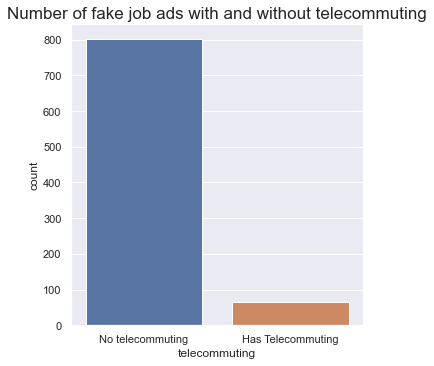

In [23]:
print(fake["telecommuting"].value_counts())
f=sb.catplot(x = "telecommuting", data = fake, kind = "count")
f.set_xticklabels(["No telecommuting", "Has Telecommuting"])
plt.title('Number of fake job ads with and without telecommuting', fontdict = {"fontsize" : 17})


=> Most fake job postings don't have telecommuting

Text(0.5, 1.0, 'Compare fake and real job ads with and without telecommuting')

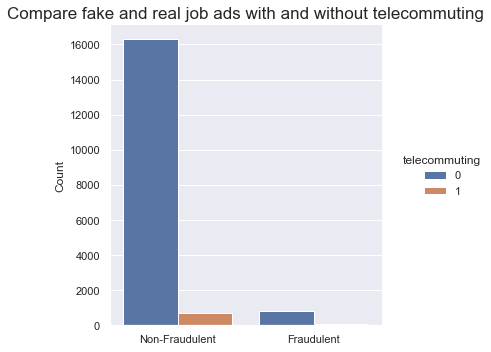

In [24]:
g= sb.catplot(data=dfcopy, x='fraudulent', hue='telecommuting', kind="count")
g.set_axis_labels("", "Count")
g.set_xticklabels(["Non-Fraudulent", "Fraudulent"])
plt.title('Compare fake and real job ads with and without telecommuting', fontdict = {"fontsize" : 17})


Most of the time, job ads don't have telecommuting, regardless of real or fake.

### Do fake job ads usually provide company's logo?

0    583
1    283
Name: has_company_logo, dtype: int64


Text(0.5, 1.0, 'Number of fake job ads with and without company logo')

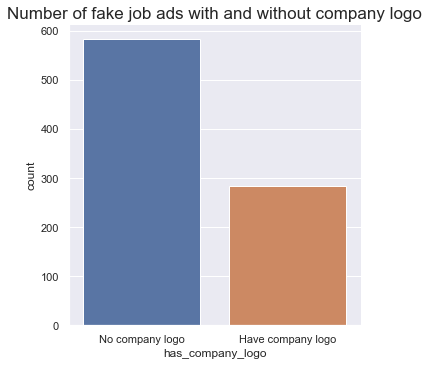

In [25]:
print(fake["has_company_logo"].value_counts())
h=sb.catplot(x = "has_company_logo", data = fake, kind = "count")
h.set_xticklabels(["No company logo", "Have company logo"])
plt.title('Number of fake job ads with and without company logo', fontdict = {"fontsize" : 17})

~600 fake job postings don't have company's logo, while only 300 of them have

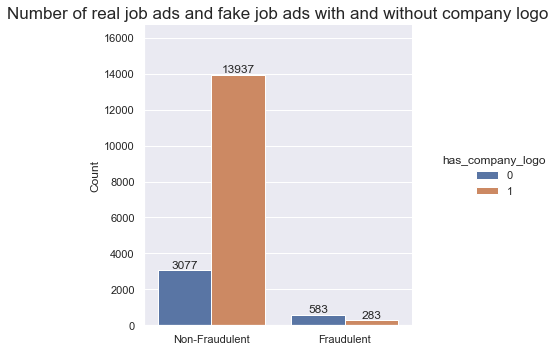

In [26]:
i=sb.catplot(data=dfcopy, x='fraudulent', hue='has_company_logo', kind="count")
i.set_axis_labels("", "Count")
i.set_xticklabels(["Non-Fraudulent", "Fraudulent"])
for ax in i.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
plt.title('Number of real job ads and fake job ads with and without company logo', fontdict = {"fontsize" : 17})
plt.show()


When we look at the whole dataset, most of the real job postings have company logo, while most of fake job posting don't.

### Do fake job ads usually screen questions?

0    616
1    250
Name: has_questions, dtype: int64


Text(0.5, 1.0, 'Number of fake job ads screening questions')

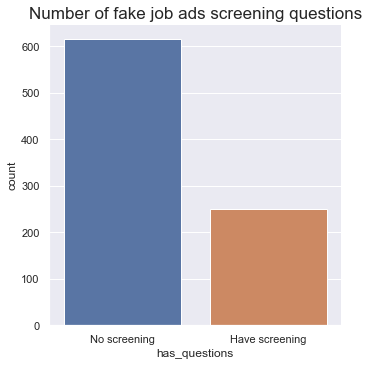

In [27]:
print(fake["has_questions"].value_counts())
j=sb.catplot(x = "has_questions", data = fake, kind = "count")
j.set_xticklabels(["No screening", "Have screening"])
plt.title('Number of fake job ads screening questions', fontdict = {"fontsize" : 17})

~ Most of the time, fake recruiters don't ask if applicants have questions or not.

Text(0.5, 1.0, 'Compare fake and real job ads if they screen questions')

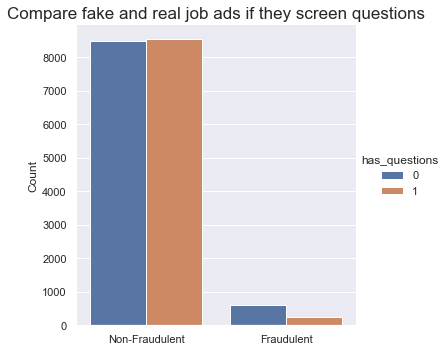

In [28]:
k=sb.catplot(data=dfcopy, x='fraudulent', hue='has_questions', kind="count")
k.set_axis_labels("", "Count")
k.set_xticklabels(["Non-Fraudulent", "Fraudulent"])
plt.title('Compare fake and real job ads if they screen questions', fontdict = {"fontsize" : 17})

### Required experience

Missing             435
Entry level         179
Mid-Senior level    113
Not Applicable       60
Associate            42
Director             17
Executive            10
Internship           10
Name: required_experience, dtype: int64


Text(0.5, 1.0, 'Required experience from fake job ads')

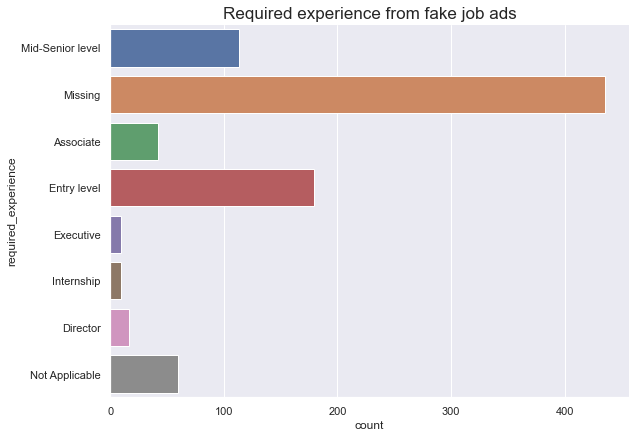

In [29]:
# count plot
print(fake["required_experience"].value_counts())
sb.catplot(y = "required_experience", data = fake, kind = "count", height=6, aspect=1.5)
plt.title('Required experience from fake job ads', fontdict = {"fontsize" : 17})

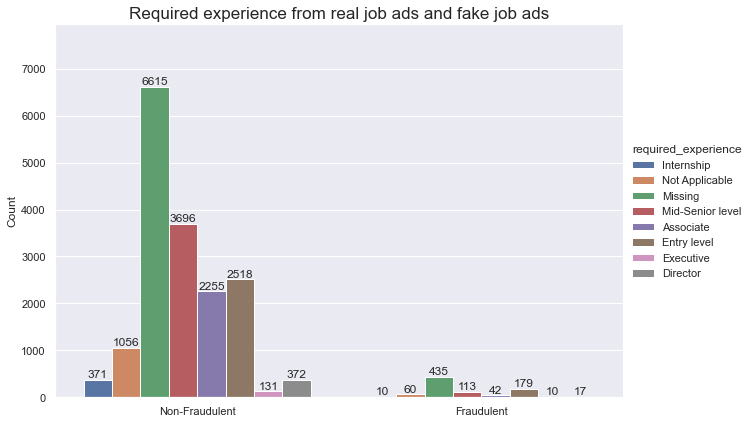

In [30]:
l=sb.catplot(data=dfcopy, x='fraudulent', hue='required_experience', kind="count",height=6, aspect=1.5)
l.set_axis_labels("", "Count")
l.set_xticklabels(["Non-Fraudulent", "Fraudulent"])
for ax in l.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
plt.title('Required experience from real job ads and fake job ads', fontdict = {"fontsize" : 17})
plt.show()

=> Most of fake job postings require entry level, while real job ask for mid-senior level of experience. This kinda makes sense, fake recruiters may wanna scam people with no experience.

### Employment type

Full-time    490
Missing      241
Part-time     74
Contract      44
Other         15
Temporary      2
Name: employment_type, dtype: int64


Text(0.5, 1.0, 'Employment types of fake job ads')

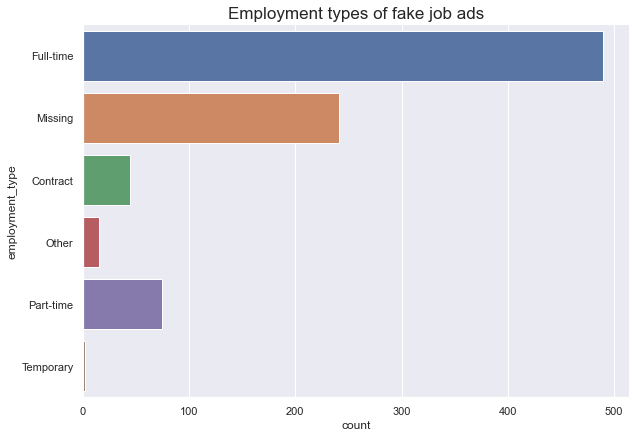

In [31]:
# count plot
print(fake["employment_type"].value_counts())
sb.catplot(y = "employment_type", data = fake, kind = "count", height=6, aspect=1.5)
plt.title('Employment types of fake job ads', fontdict = {"fontsize" : 17})

Text(0.5, 1.0, 'Employment types of real jobs and fake job ads')

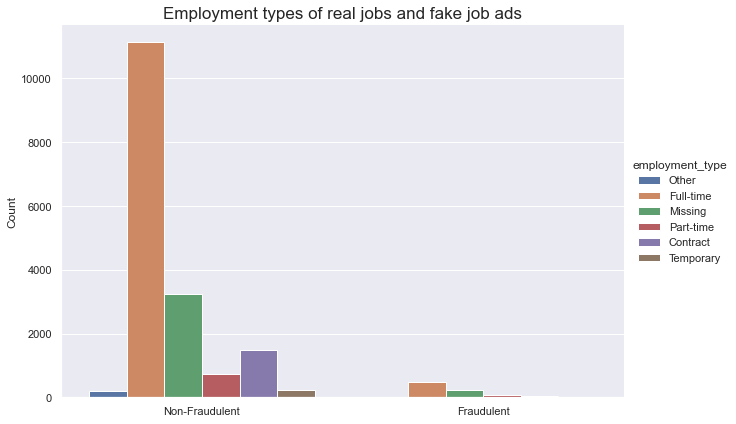

In [32]:
m=sb.catplot(data=dfcopy, x='fraudulent', hue='employment_type', kind="count",height=6, aspect=1.5)
m.set_axis_labels("", "Count")
m.set_xticklabels(["Non-Fraudulent", "Fraudulent"])
plt.title('Employment types of real jobs and fake job ads', fontdict = {"fontsize" : 17})

=> Mostly full time (for both real and fake job postings)

### Required education

Missing                              451
High School or equivalent            170
Bachelor's Degree                    100
Unspecified                           61
Master's Degree                       31
Some High School Coursework           20
Certification                         19
Associate Degree                       6
Professional                           4
Some College Coursework Completed      3
Doctorate                              1
Name: required_education, dtype: int64


Text(0.5, 1.0, 'Required education of fake job ads')

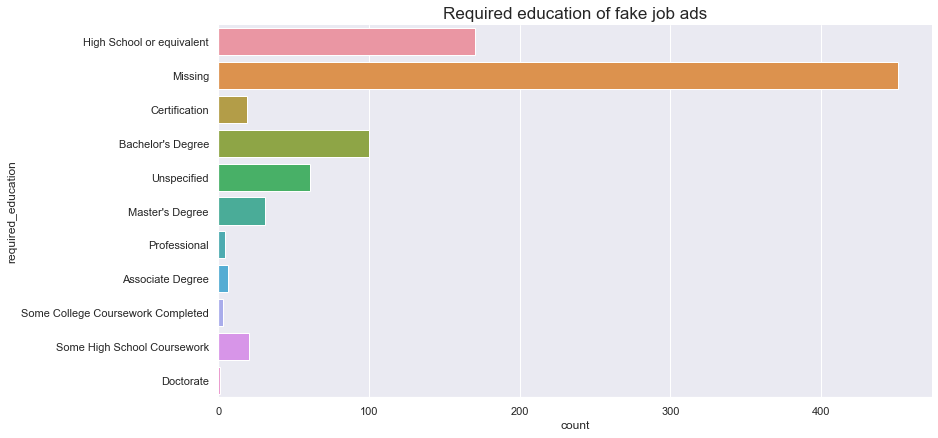

In [33]:
print(fake["required_education"].value_counts())
sb.catplot(y = "required_education", data = fake, kind = "count",height=6, aspect=2.2)
plt.title('Required education of fake job ads', fontdict = {"fontsize" : 17})

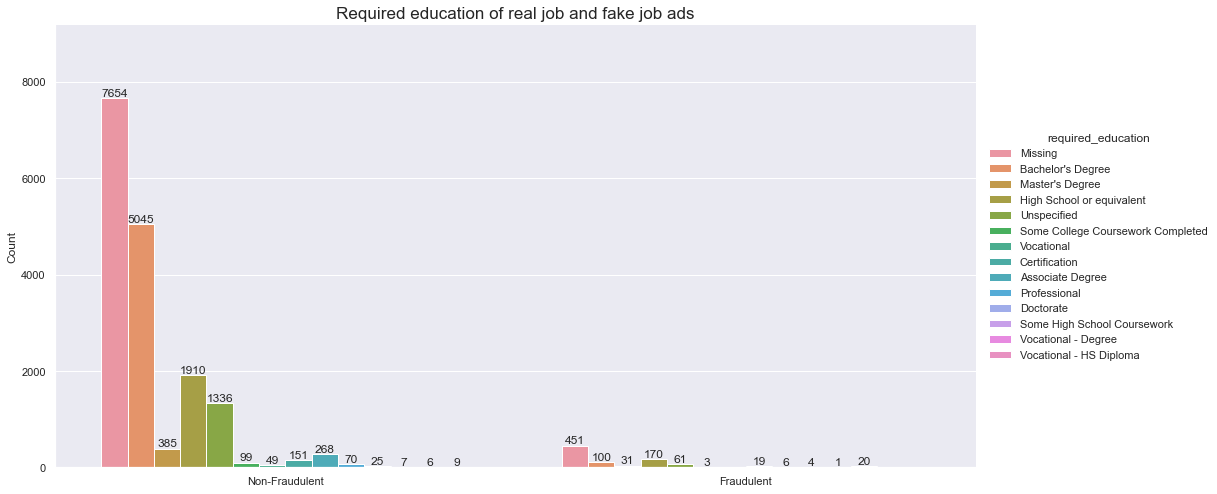

In [34]:
n=sb.catplot(data=dfcopy, x='fraudulent', hue='required_education', kind="count",height=7, aspect=2)
n.set_axis_labels("", "Count")
n.set_xticklabels(["Non-Fraudulent", "Fraudulent"])
for ax in n.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
    
plt.title('Required education of real job and fake job ads', fontdict = {"fontsize" : 17})
plt.show()

=> While real job postings target applicants with bachelor's degrees, "high school or equivalent" is the level of education that dominates most of the fake job postings. => Fake recruiters tend to trap people with low experience.

### Industry

In [35]:
# count plot
print(fake["industry"].value_counts())

Missing                        275
Oil & Energy                   109
Accounting                      57
Hospital & Health Care          51
Marketing and Advertising       45
                              ... 
Civic & Social Organization      1
Public Safety                    1
Wholesale                        1
Consumer Goods                   1
Online Media                     1
Name: industry, Length: 63, dtype: int64


In [36]:
fakeindustry = fake[fake['industry'].isin(["Oil & Energy", "Accounting", "Hospital & Health Care", "Marketing and Advertising", "Financial Services"])]

Text(0.5, 1.0, 'Top industries in fake job ads')

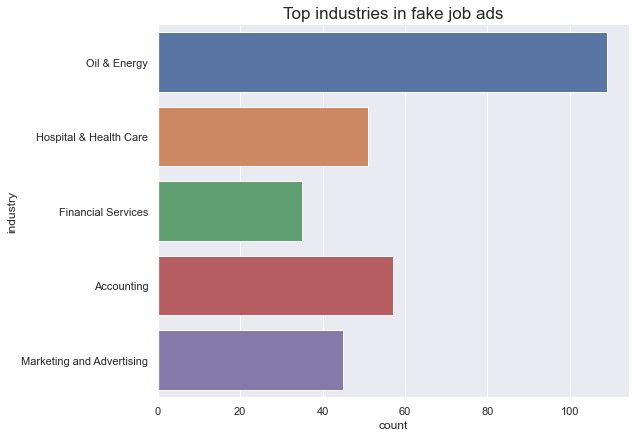

In [37]:
sb.catplot(y = "industry", data = fakeindustry, kind = "count",height=6, aspect=1.5)
plt.title('Top industries in fake job ads', fontdict = {"fontsize" : 17})

In [38]:
real = dfcopy.loc[dfcopy['fraudulent'] == 0]

In [39]:
# count plot
print(real["industry"].value_counts())

Missing                                4628
Information Technology and Services    1702
Computer Software                      1371
Internet                               1062
Education Management                    822
                                       ... 
Wine and Spirits                          1
Sporting Goods                            1
Shipbuilding                              1
Alternative Dispute Resolution            1
Military                                  1
Name: industry, Length: 131, dtype: int64


In [40]:
realindustry = real[real['industry'].isin(["Information Technology and Services", "Computer Software", "Internet", "Education Management", "Marketing and Advertising"])]

Text(0.5, 1.0, 'Top industries in real job ads')

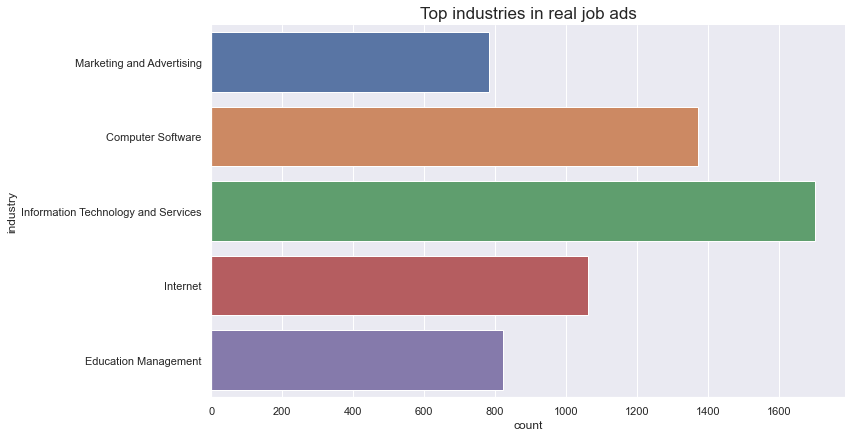

In [41]:
sb.catplot(y = "industry", data = realindustry, kind = "count", height=6, aspect=2)
plt.title('Top industries in real job ads', fontdict = {"fontsize" : 17})

### Function

In [42]:
# count plot
print(fake["function"].value_counts())

Missing                   337
Administrative            119
Engineering               113
Customer Service           67
Sales                      41
Other                      32
Information Technology     32
Accounting/Auditing        29
Finance                    15
Business Development       13
Marketing                  10
Project Management         10
Human Resources             9
Management                  6
Financial Analyst           5
Advertising                 5
Consulting                  4
Data Analyst                4
Distribution                3
Design                      3
Manufacturing               2
Public Relations            1
Education                   1
Business Analyst            1
Strategy/Planning           1
General Business            1
Art/Creative                1
Health Care Provider        1
Name: function, dtype: int64


In [43]:
fakefunction = fake[fake['function'].isin(["Administrative", "Engineering", "Customer Service", "Sales"])]

Text(0.5, 1.0, 'Top functions in fake job ads')

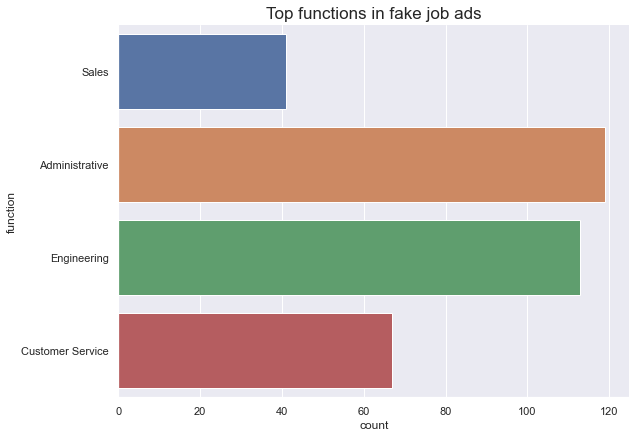

In [44]:
sb.catplot(y = "function", data = fakefunction, kind = "count", height=6, aspect=1.5)
plt.title('Top functions in fake job ads', fontdict = {"fontsize" : 17})

In [45]:
# count plot
print(real["function"].value_counts())

Missing                   6118
Information Technology    1717
Sales                     1427
Engineering               1235
Customer Service          1162
Marketing                  820
Administrative             511
Health Care Provider       337
Design                     337
Education                  324
Management                 311
Other                      293
Business Development       215
Human Resources            196
Accounting/Auditing        183
Project Management         173
Finance                    157
Consulting                 140
Writing/Editing            132
Art/Creative               131
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 85
Business Analyst            83
Data Analyst                78
Public Relations            75
Manufacturing               72
General Business            67
Research                    50
Legal                       47
Strategy/Planning           45
Training

In [46]:
realfunction = real[real['function'].isin(["Information Technology", "Engineering", "Customer Service", "Sales", "Marketing"])]

Text(0.5, 1.0, 'Top functions in real job ads')

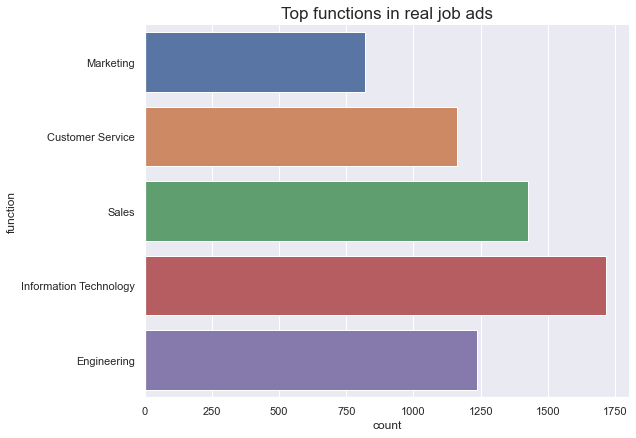

In [47]:
sb.catplot(y = "function", data = realfunction, kind = "count", height=6, aspect=1.5)
plt.title('Top functions in real job ads', fontdict = {"fontsize" : 17})

# Word Cloud

In [48]:
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [49]:
df2 = pd.read_csv("fake_job_postings.csv", skipinitialspace = True)

In [50]:
df2.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [51]:
df2 = df2.replace(np.nan,"")

In [52]:
df2.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### Remove unneccessary columns

In [53]:
columns=['job_id', 'telecommuting', 'has_questions', 'salary_range']
for col in columns:
    del df2[col]

### Combine text in a single column

In [54]:
text_data = df2.select_dtypes(include="object")
text_data.drop(["location"],axis=1,inplace=True)
text_col = text_data.columns
df[text_col] = df2[text_col].replace(np.nan,"")

In [55]:
df2['text'] = ""
for col in text_data.columns:
    df2["text"] = df2["text"] + " " + df2[col]

In [56]:
columns=['title', 'location','department', 'company_profile', 'employment_type','description', 'requirements', 'benefits','industry', 'function', 'has_company_logo', 'required_experience', 'required_education']
for col in columns:
    del df2[col]

In [57]:
df2.head()

,fraudulent,text
0,0,"Marketing Intern Marketing We're Food52, and ..."
1,0,Customer Service - Cloud Video Production Suc...
2,0,Commissioning Machinery Assistant (CMA) Valo...
3,0,Account Executive - Washington DC Sales Our p...
4,0,Bill Review Manager SpotSource Solutions LLC...


In [58]:
#seperate fake and real job
fake = df2[df2.fraudulent==1]
real = df2[df2.fraudulent==0]

In [59]:
faketext = fake.text
realtext = real.text

#### Word Cloud for fake job ads

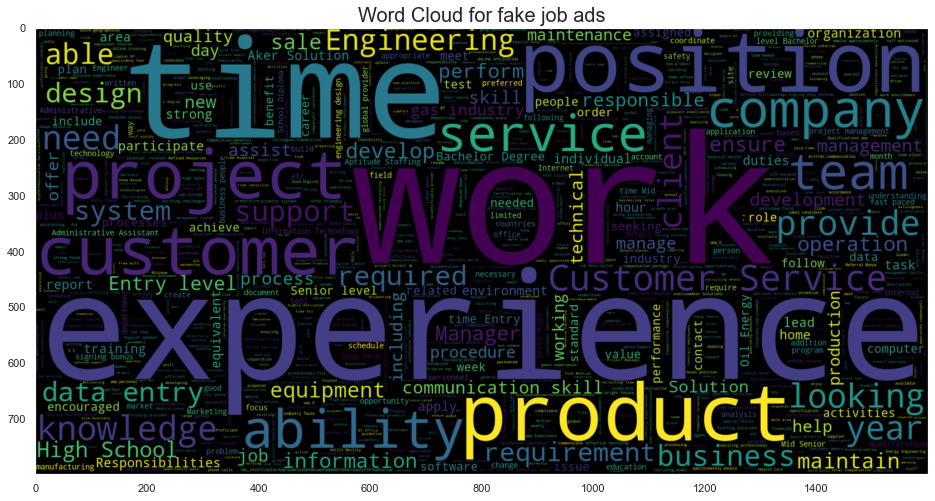

In [60]:
#Word Cloud of fake job postings
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

plt.figure(figsize = (16,14))
plt.title('Word Cloud for fake job ads', fontdict = {"fontsize" : 20})
plt.grid(None)
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(faketext)))
plt.imshow(wc,interpolation = 'bilinear')

#### Word Cloud for real job ads

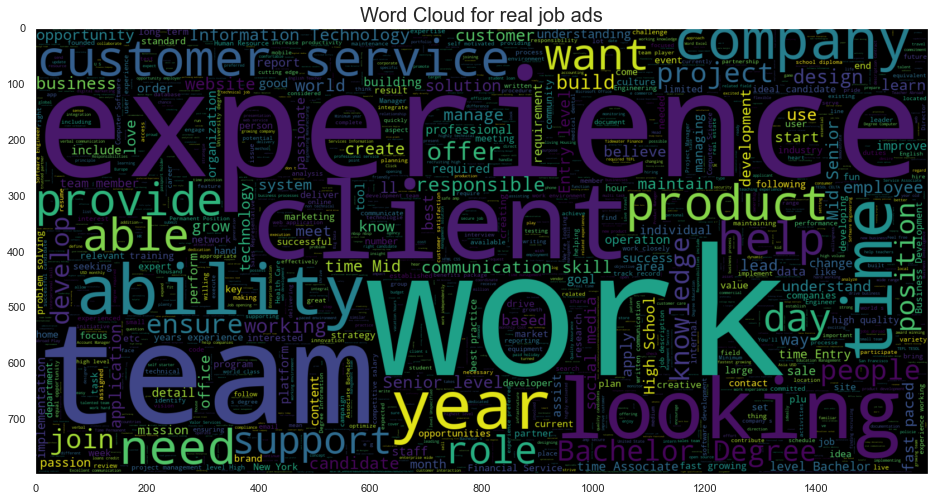

In [61]:
#Word Cloud of real job ads
plt.figure(figsize = (16,14))
plt.title('Word Cloud for real job ads', fontdict = {"fontsize" : 20})
plt.grid(None)
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(realtext)))
plt.imshow(wc,interpolation = 'bilinear')

--> As we can see, many similar words appear in both real and fake job postings